In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


### Data Set: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#

Columns description:

https://github.com/LuisM78/Appliances-energy-prediction-data/blob/master/variables%20description.txt
Excerpt:
```
date time year-month-day hour:minute:second 
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chièvres weather station), in Celsius
Pressure (from Chièvres weather station), in mm Hg
RH_out, Humidity outside (from Chièvres weather station), in %
Windspeed (from Chièvres weather station), in m/s
Visibility (from Chièvres weather station), in km
Tdewpoint (from Chièvres weather station), °C
rv1, Random variable 1, nondimensional
rv2, Rnadom variable 2, nondimensional

Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from 
Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.
```

Goal: predict the `Appliances, energy use in Wh` given other columns

In [750]:
df = pd.read_csv('energydata_complete.csv')
df[:15].T

0                    1                    2   \
date         2016-01-11 17:00:00  2016-01-11 17:10:00  2016-01-11 17:20:00   
Appliances                    60                   60                   50   
lights                        30                   30                   30   
T1                         19.89                19.89                19.89   
RH_1                     47.5967              46.6933                 46.3   
T2                          19.2                 19.2                 19.2   
RH_2                       44.79              44.7225              44.6267   
T3                         19.79                19.79                19.79   
RH_3                       44.73                44.79              44.9333   
T4                            19                   19              18.9267   
RH_4                     45.5667              45.9925                45.89   
T5                       17.1667              17.1667              17.1667   
RH_5                        55.2                 55.2                55.09   
T6                       7.02667              6.83333                 6.56   
RH_6                     84.2567              84.0633              83.1567   
T7                          17.2                 17.2                 17.2   
RH_7                     41.6267                41.56              41.4333   
T8                          18.2                 18.2                 18.2   
RH_8                        48.9              48.8633                48.73   
T9                       17.0333              17.0667                   17   
RH_9                       45.53                45.56                 45.5   
T_out                        6.6              6.48333              6.36667   
Press_mm_hg                733.5                733.6                733.7   
RH_out                        92                   92                   92   
Windspeed                      7              6.66667              6.33333   
Visibility                    63              59.1667              55.3333   
Tdewpoint                    5.3                  5.2                  5.1   
rv1                      13.2754              18.6062              28.6427   
rv2                      13.2754              18.6062              28.6427   

                              3                    4                    5   \
date         2016-01-11 17:30:00  2016-01-11 17:40:00  2016-01-11 17:50:00   
Appliances                    50                   60                   50   
lights                        40                   40                   40   
T1                         19.89                19.89                19.89   
RH_1                     46.0667              46.3333              46.0267   
T2                          19.2                 19.2                 19.2   
RH_2                       44.59                44.53                 44.5   
T3                         19.79                19.79                19.79   
RH_3                          45                   45              44.9333   
T4                         18.89                18.89                18.89   
RH_4                     45.7233                45.53                45.73   
T5                       17.1667                 17.2              17.1333   
RH_5                       55.09                55.09                55.03   
T6                       6.43333              6.36667                  6.3   
RH_6                     83.4233              84.8933              85.7667   
T7                       17.1333                 17.2              17.1333   
RH_7                       41.29                41.23                41.26   
T8                          18.1                 18.1                 18.1   
RH_8                       48.59                48.59                48.59   
T9                            17                   17                   17   
RH_9                        45.4                 45

In [751]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.411665    755.522602   
std        ...           2.014712      4.151497      5.317409      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.666667    750.933333   
50%        ...          19.390000     40.900000      6.916667    756.100000   
75%        ...          20.600000     44.338095     10.408333    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

At some point, it was believed the consumption in house could be different depending on the hour of the day and whether we're on the week-end.
Here's the way to one-hot-encode these

In [758]:
# parse date and one hot encode obtained hour of day and week-end or not

from datetime import datetime
def hour_of_day(dt_str):
    dt=datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')
    return str(dt.hour) # as string for later one-hot-encoding
def is_week_end(dt_str):
    dt=datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')
    return str(1 if dt.weekday() in {5,6} else 0) # as string for later one-hot-encoding

df['hour_of_day'] = df['date'].apply(hour_of_day).astype(object)
df['is_week_end'] = df['date'].apply(is_week_end).astype(object)
df = pd.concat([df,pd.get_dummies(df[ ['hour_of_day', 'is_week_end'] ])], axis=1) 


In [759]:
df[:5].T

0                    1                    2  \
date            2016-01-11 17:00:00  2016-01-11 17:10:00  2016-01-11 17:20:00   
Appliances                       60                   60                   50   
lights                           30                   30                   30   
T1                            19.89                19.89                19.89   
RH_1                        47.5967              46.6933                 46.3   
T2                             19.2                 19.2                 19.2   
RH_2                          44.79              44.7225              44.6267   
T3                            19.79                19.79                19.79   
RH_3                          44.73                44.79              44.9333   
T4                               19                   19              18.9267   
RH_4                        45.5667              45.9925                45.89   
T5                          17.1667              17.1667              17.1667   
RH_5                           55.2                 55.2                55.09   
T6                          7.02667              6.83333                 6.56   
RH_6                        84.2567              84.0633              83.1567   
T7                             17.2                 17.2                 17.2   
RH_7                        41.6267                41.56              41.4333   
T8                             18.2                 18.2                 18.2   
RH_8                           48.9              48.8633                48.73   
T9                          17.0333              17.0667                   17   
RH_9                          45.53                45.56                 45.5   
T_out                           6.6              6.48333              6.36667   
Press_mm_hg                   733.5                733.6                733.7   
RH_out                           92                   92                   92   
Windspeed                         7              6.66667              6.33333   
Visibility                       63              59.1667              55.3333   
Tdewpoint                       5.3                  5.2                  5.1   
rv1                         13.2754              18.6062              28.6427   
rv2                         13.2754              18.6062              28.6427   
hour_of_day                      17                   17                   17   
...                             ...                  ...                  ...   
hour_of_day_8                     0                    0                    0   
hour_of_day_9                     0                    0                    0   
is_week_end_0                     1                    1                    1   
is_week_end_1                     0                    0                    0   
hour_of_day_0                     0                    0                    0   
hour_of_day_1                     0                    0                    0   
hour_of_day_10                    0                    0                    0   
hour_of_day_11                    0                    0                    0   
hour_of_day_12                    0                    0                    0   
hour_of_day_13                    0                    0                    0   
hour_of_day_14                    0                    0                    0   
hour_of_day_15                    0                    0                    0   
hour_of_day_16                    0                    0                    0   
hour_of_day_17                    1                    1                    1   
hour_of_day_18                    0                    0                    0   
hour_of_day_19                    0                    0                    0   
hour_of_day_2                     0                    0                    0   
hour_of_day_20                    0                    0         

But it turned out these features were not really used. Below the GradientBoostedRegressor feature importance assigned a negligible importance to any of those time-related features. So we remove them below (along with other columns)

In [760]:
del df['date']
del df['hour_of_day']
del df['is_week_end']
del df['lights']
del df['rv1']
del df['rv2']

### Distributions of variables

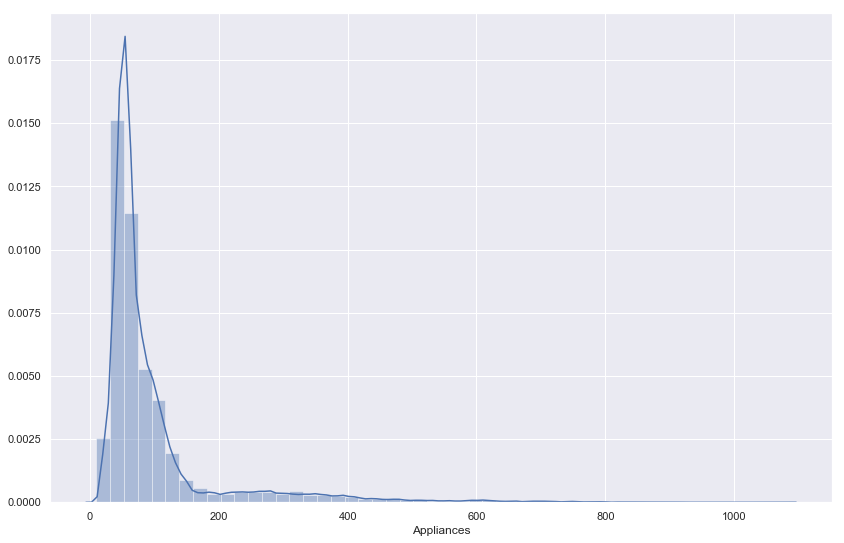

In [749]:
# First the variable to predict
# loooong right tail with some extreme consumptions
sns.set(); np.random.seed(0)
plt.figure(figsize=(14,9))
x = np.random.randn(100)
ax = sns.distplot(df['Appliances'])

In [477]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'hour_of_day_0', 'hour_of_day_1', 'hour_of_day_10',
       'hour_of_day_11', 'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14',
       'hour_of_day_15', 'hour_of_day_16', 'hour_of_day_17', 'hour_of_day_18',
       'hour_of_day_19', 'hour_of_day_2', 'hour_of_day_20', 'hour_of_day_21',
       'hour_of_day_22', 'hour_of_day_23', 'hour_of_day_3', 'hour_of_day_4',
       'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7', 'hour_of_day_8',
       'hour_of_day_9', 'is_week_end_0', 'is_week_end_1'],
      dtype='object')

In [478]:
# exploratory data analysis columns
eda_columns = list(df.columns[1:list(df.columns.values).index('Tdewpoint')+1])
', '.join(eda_columns)

'T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint'

In [479]:
def data_shape(series):
    f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,5))
    ax1.boxplot(series)
    sns.distplot(series, ax=ax2)
    stats.probplot(series, plot=plt)
    print('quantiles: ' + str(series.quantile(q=[.01,.05,.1,.25,.5,.75,.9,0.95,.99])))

quantiles: 0.01    17.790000
0.05    19.100000
0.10    19.700000
0.25    20.760000
0.50    21.600000
0.75    22.600000
0.90    23.963333
0.95    24.726455
0.99    25.500000
Name: T1, dtype: float64


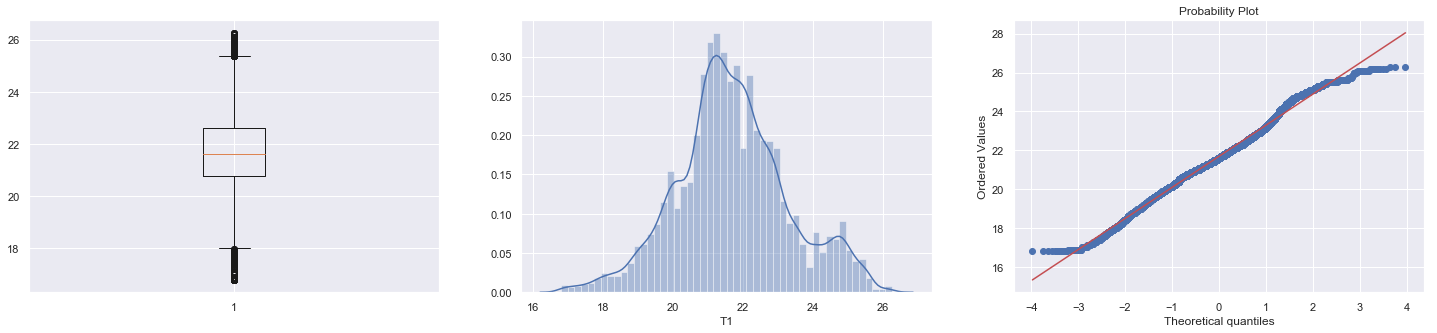

quantiles: 0.01    32.628933
0.05    34.700000
0.10    35.466667
0.25    37.333333
0.50    39.656667
0.75    43.066667
0.90    45.700000
0.95    47.326667
0.99    50.492200
Name: RH_1, dtype: float64


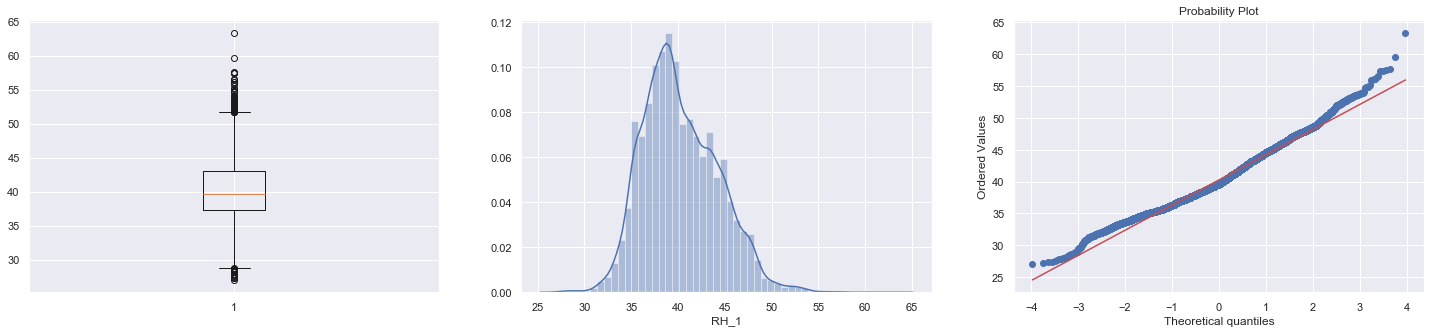

quantiles: 0.01    16.555667
0.05    17.323333
0.10    17.890000
0.25    18.790000
0.50    20.000000
0.75    21.500000
0.90    23.331200
0.95    24.557667
0.99    26.952857
Name: T2, dtype: float64


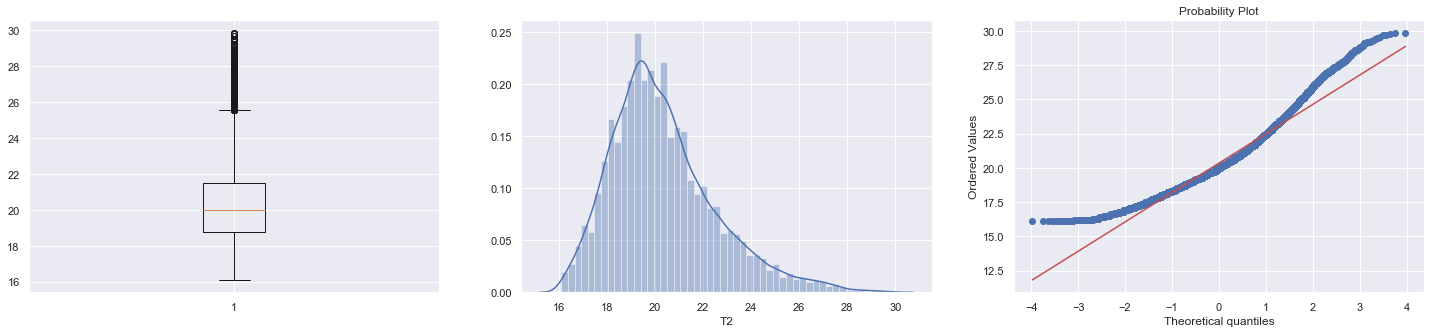

quantiles: 0.01    30.210200
0.05    33.432333
0.10    35.319071
0.25    37.900000
0.50    40.500000
0.75    43.260000
0.90    45.227333
0.95    46.664333
0.99    49.790000
Name: RH_2, dtype: float64


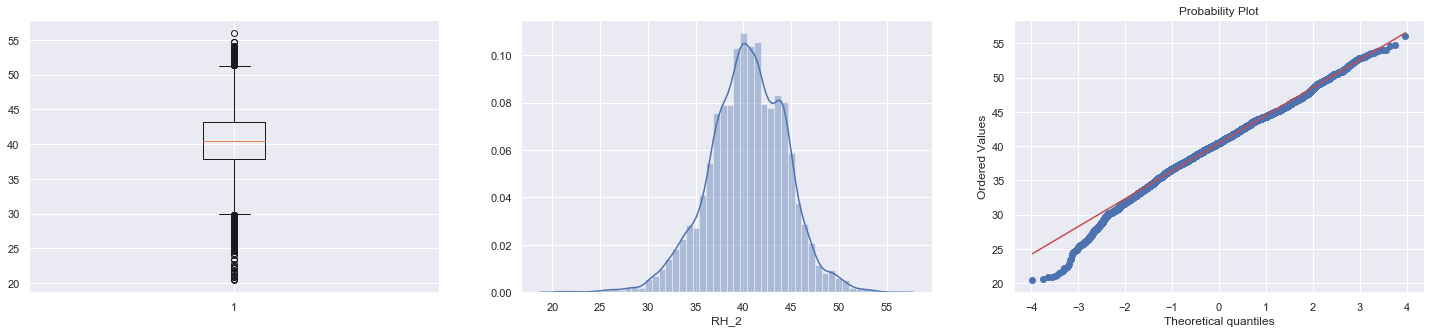

quantiles: 0.01    18.100000
0.05    19.500000
0.10    19.923524
0.25    20.790000
0.50    22.100000
0.75    23.290000
0.90    25.100000
0.95    26.200000
0.99    27.133333
Name: T3, dtype: float64


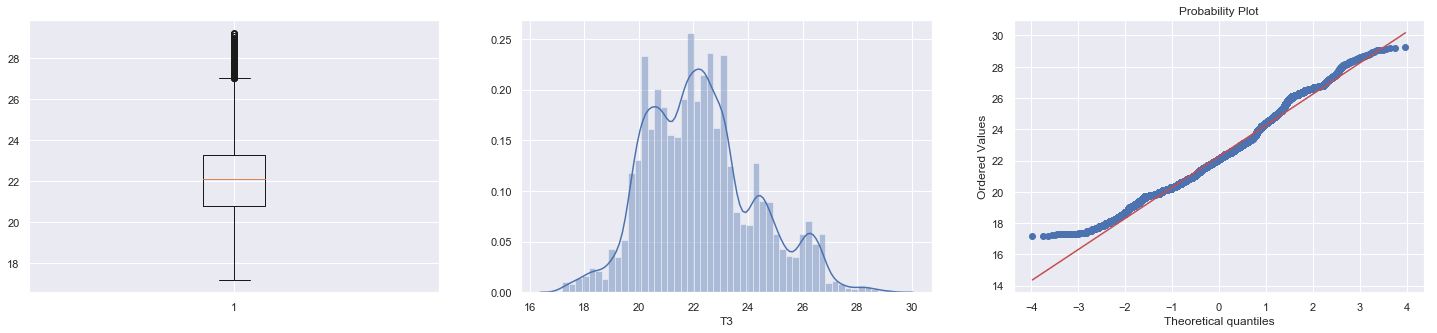

quantiles: 0.01    33.663333
0.05    34.760000
0.10    35.400000
0.25    36.900000
0.50    38.530000
0.75    41.760000
0.90    44.363333
0.95    45.090000
0.99    46.500000
Name: RH_3, dtype: float64


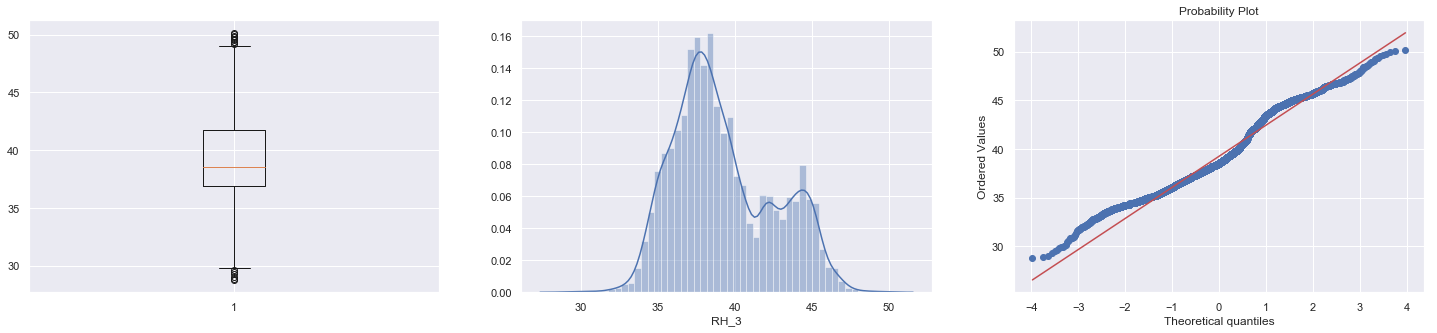

quantiles: 0.01    15.860000
0.05    17.790000
0.10    18.500000
0.25    19.530000
0.50    20.666667
0.75    22.100000
0.90    23.790000
0.95    24.500000
0.99    25.600000
Name: T4, dtype: float64


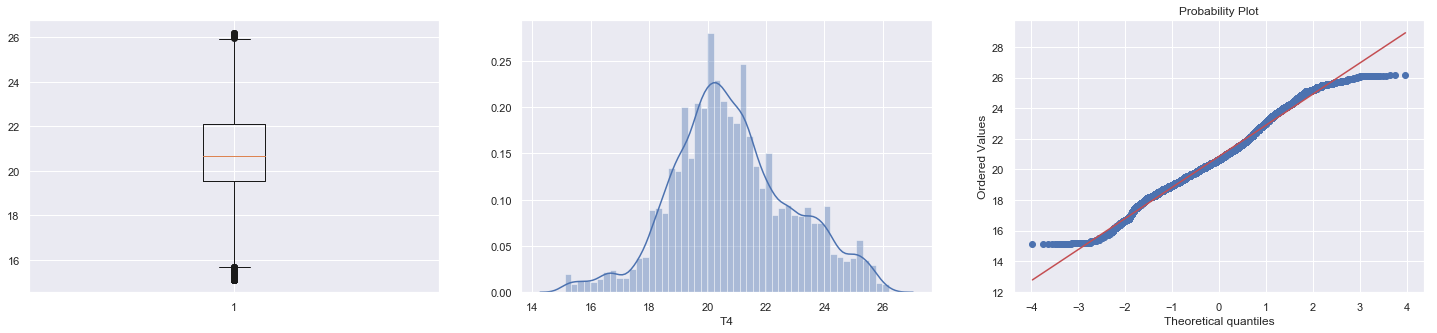

quantiles: 0.01    31.790000
0.05    33.000000
0.10    33.758000
0.25    35.530000
0.50    38.400000
0.75    42.156667
0.90    45.500000
0.95    46.790000
0.99    49.200000
Name: RH_4, dtype: float64


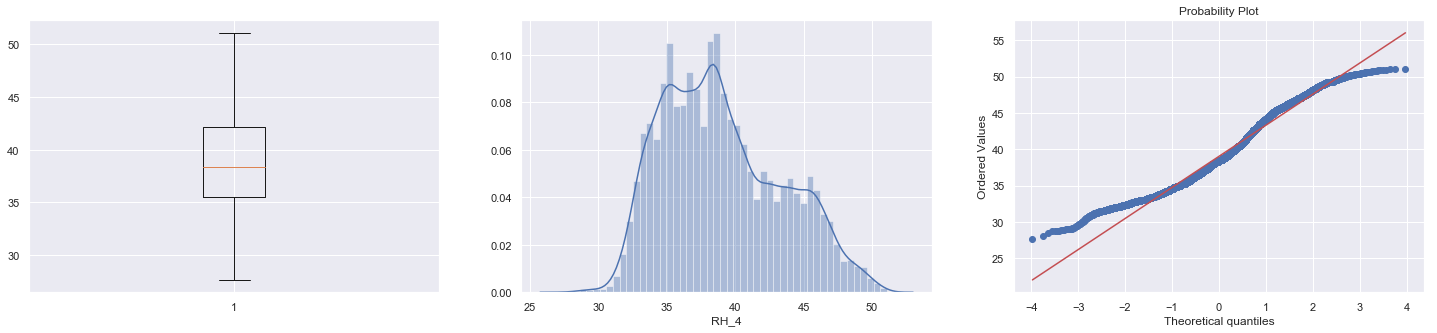

quantiles: 0.01    15.676700
0.05    17.100000
0.10    17.500000
0.25    18.277500
0.50    19.390000
0.75    20.619643
0.90    22.480200
0.95    23.390000
0.99    24.100000
Name: T5, dtype: float64


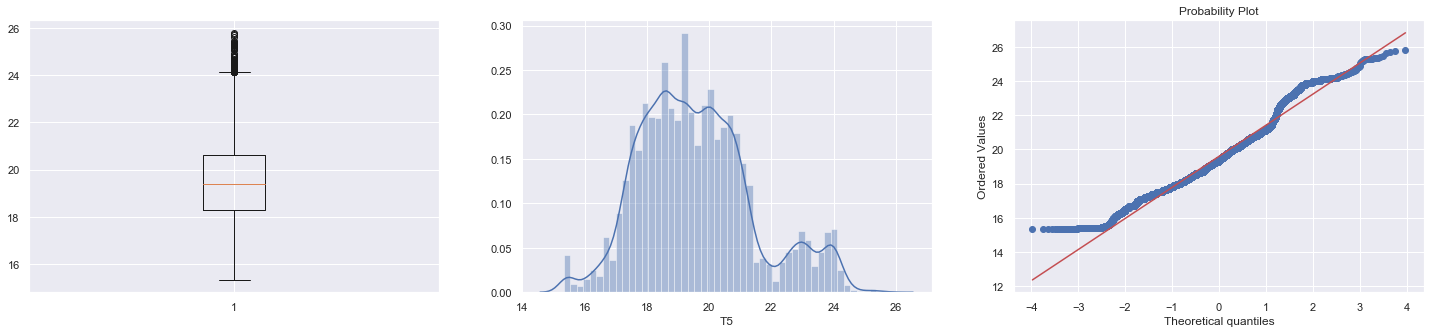

quantiles: 0.01    38.200000
0.05    40.790000
0.10    42.590000
0.25    45.400000
0.50    49.090000
0.75    53.663333
0.90    60.875333
0.95    70.390000
0.99    85.589367
Name: RH_5, dtype: float64


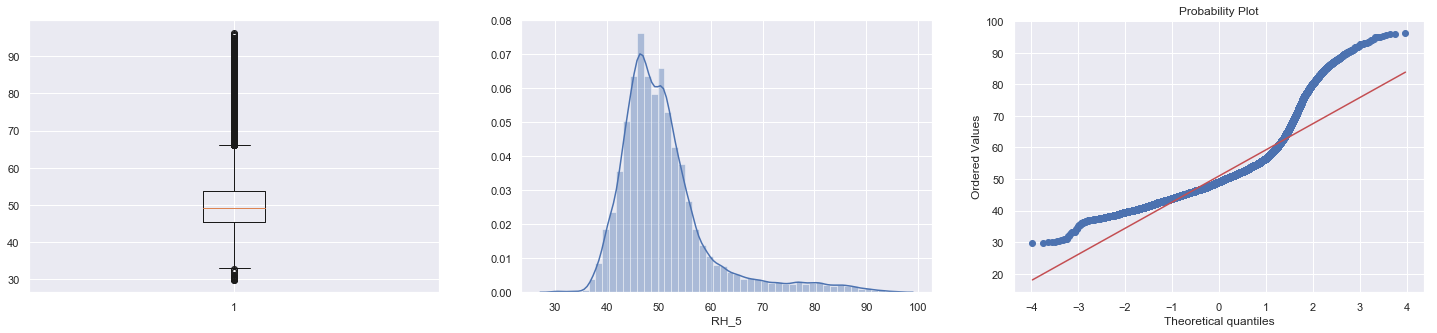

quantiles: 0.01    -4.793700
0.05    -0.666667
0.10     0.833333
0.25     3.626667
0.50     7.300000
0.75    11.256000
0.90    16.058000
0.95    19.551200
0.99    25.147270
Name: T6, dtype: float64


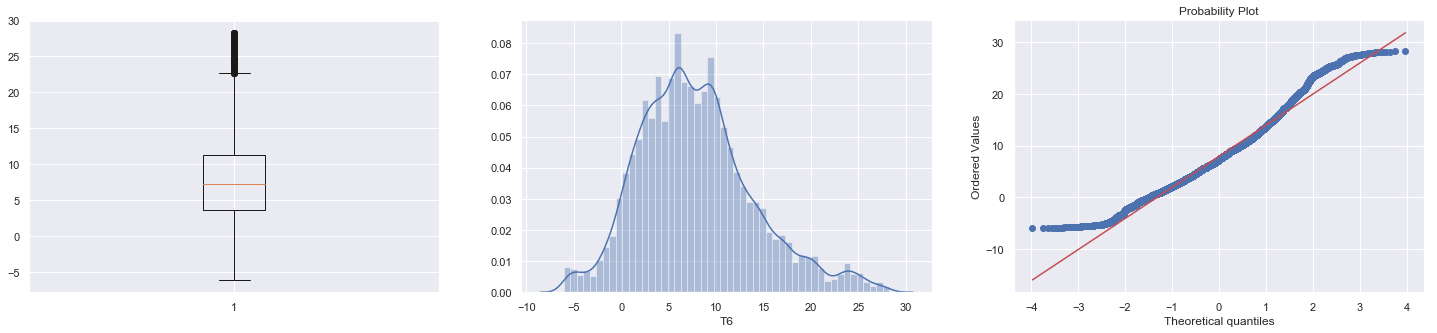

quantiles: 0.01     1.000000
0.05     1.000000
0.10     5.291333
0.25    30.025000
0.50    55.290000
0.75    83.226667
0.90    94.466667
0.95    98.590000
0.99    99.900000
Name: RH_6, dtype: float64


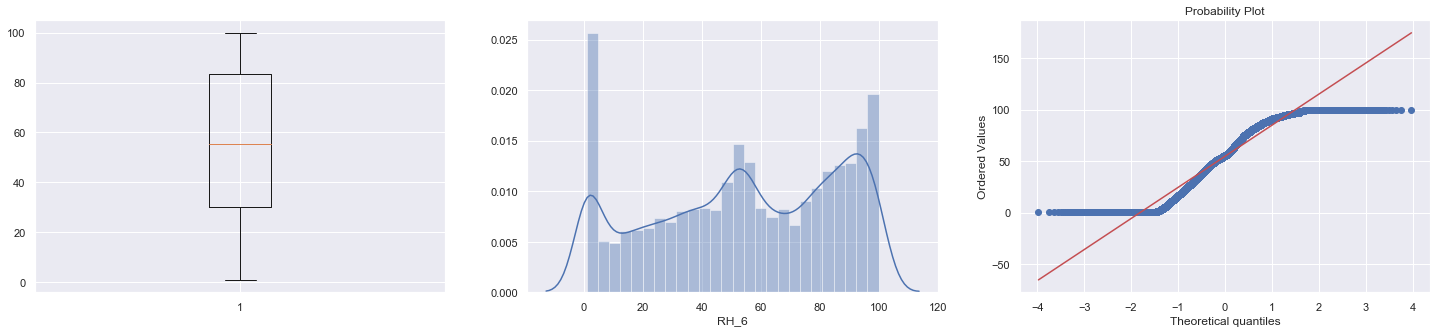

quantiles: 0.01    15.704300
0.05    17.005556
0.10    17.790000
0.25    18.700000
0.50    20.033333
0.75    21.600000
0.90    23.390000
0.95    24.081000
0.99    24.890000
Name: T7, dtype: float64


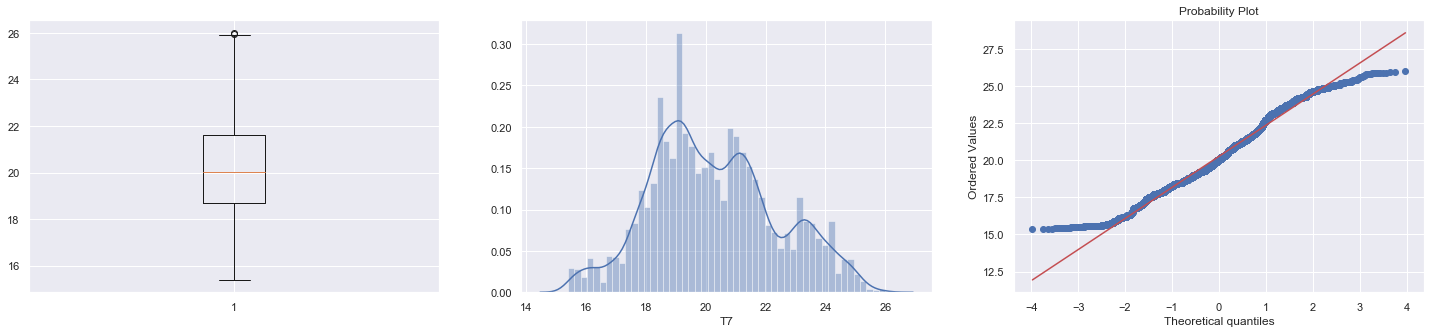

quantiles: 0.01    25.133333
0.05    27.700000
0.10    29.030000
0.25    31.500000
0.50    34.863333
0.75    39.000000
0.90    42.590000
0.95    44.200000
0.99    46.398752
Name: RH_7, dtype: float64


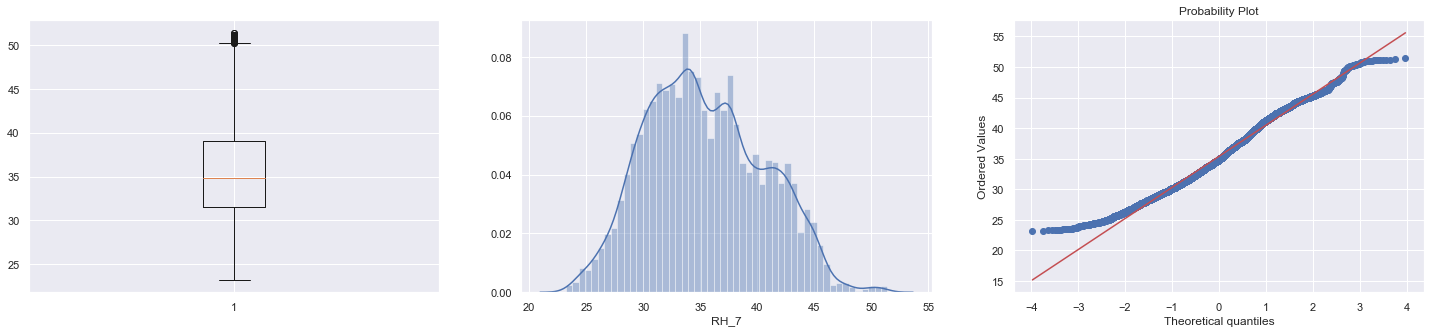

quantiles: 0.01    17.390000
0.05    18.356667
0.10    19.390000
0.25    20.790000
0.50    22.100000
0.75    23.390000
0.90    24.456000
0.95    25.100000
0.99    26.225920
Name: T8, dtype: float64


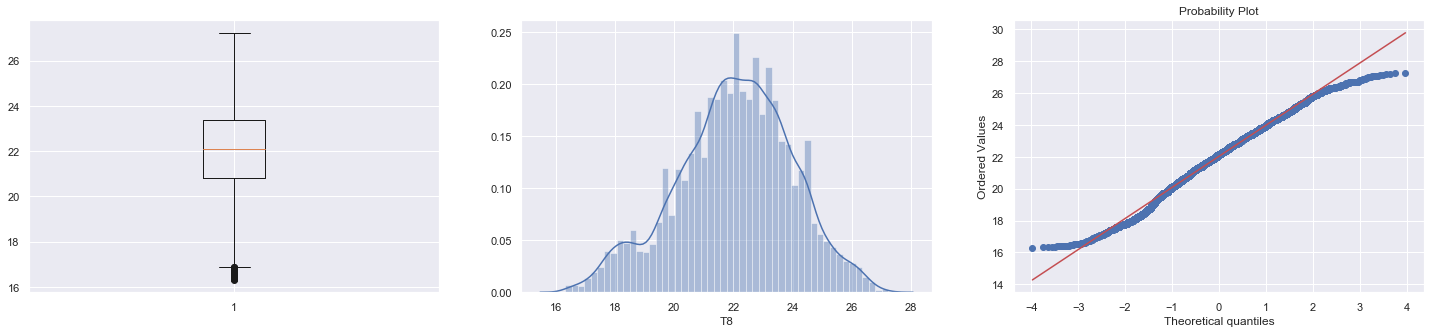

quantiles: 0.01    32.590850
0.05    35.258200
0.10    36.625238
0.25    39.066667
0.50    42.375000
0.75    46.536000
0.90    50.374000
0.95    52.066917
0.99    54.860889
Name: RH_8, dtype: float64


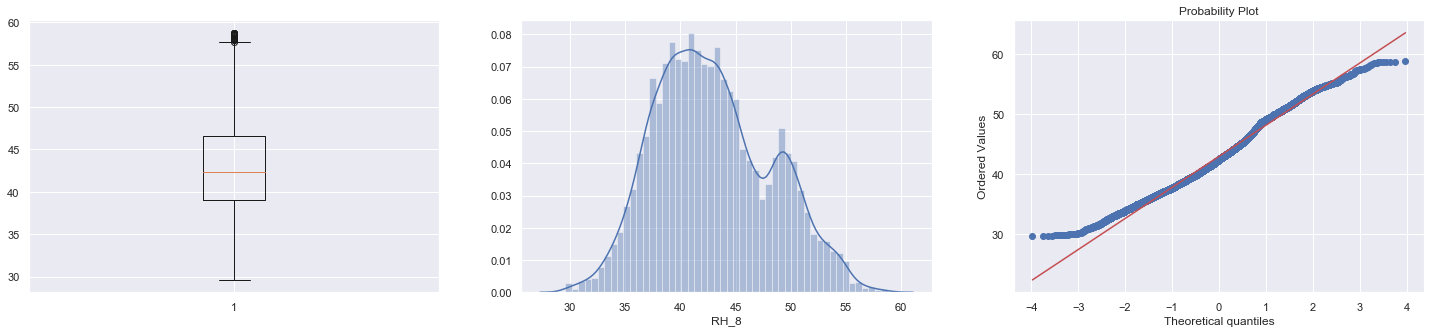

quantiles: 0.01    15.420617
0.05    16.390000
0.10    17.100000
0.25    18.000000
0.50    19.390000
0.75    20.600000
0.90    22.700000
0.95    23.200000
0.99    24.100000
Name: T9, dtype: float64


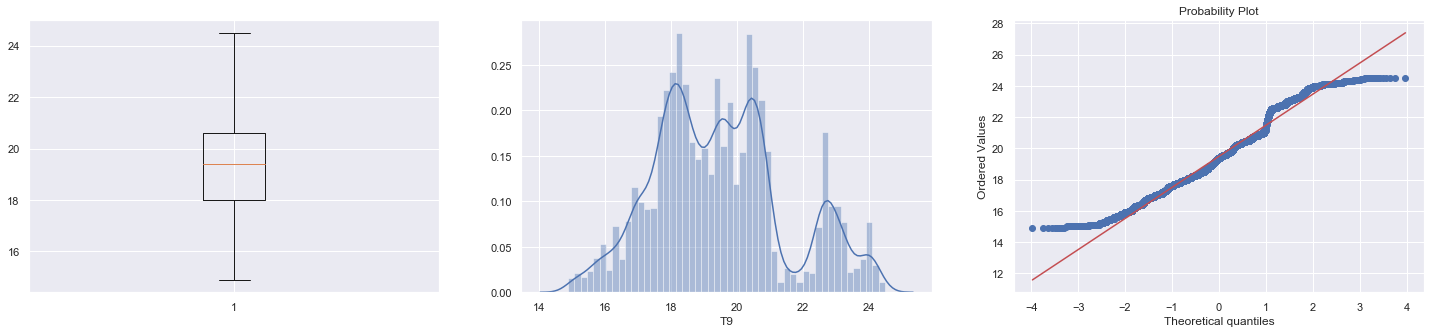

quantiles: 0.01    33.090000
0.05    35.700000
0.10    36.850000
0.25    38.500000
0.50    40.900000
0.75    44.338095
0.90    47.736000
0.95    49.046929
0.99    50.995259
Name: RH_9, dtype: float64


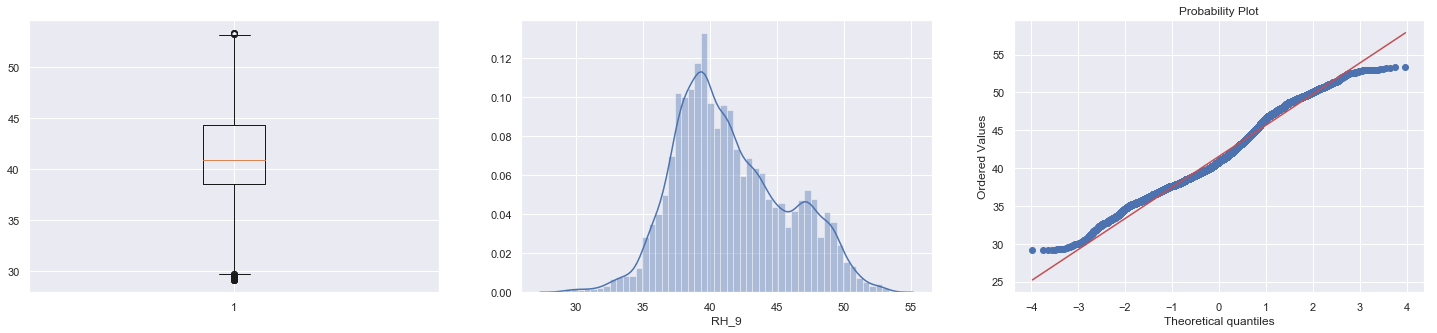

quantiles: 0.01    -3.600000
0.05    -0.300000
0.10     0.973333
0.25     3.666667
0.50     6.916667
0.75    10.408333
0.90    14.550000
0.95    17.100000
0.99    22.500000
Name: T_out, dtype: float64


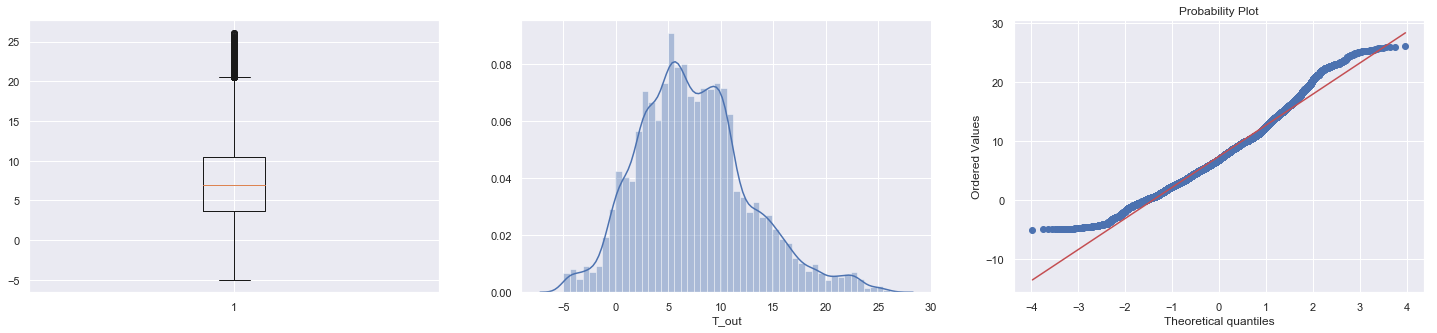

quantiles: 0.01    735.411333
0.05    742.228333
0.10    745.783333
0.25    750.933333
0.50    756.100000
0.75    760.933333
0.90    764.833333
0.95    766.600000
0.99    769.700000
Name: Press_mm_hg, dtype: float64


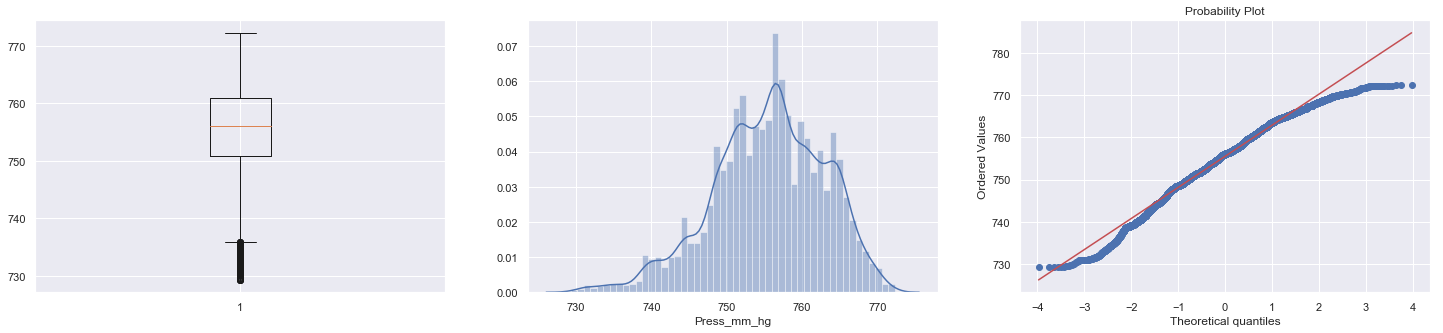

quantiles: 0.01    36.666667
0.05    51.000000
0.10    57.333333
0.25    70.333333
0.50    83.666667
0.75    91.666667
0.90    95.666667
0.95    97.000000
0.99    99.000000
Name: RH_out, dtype: float64


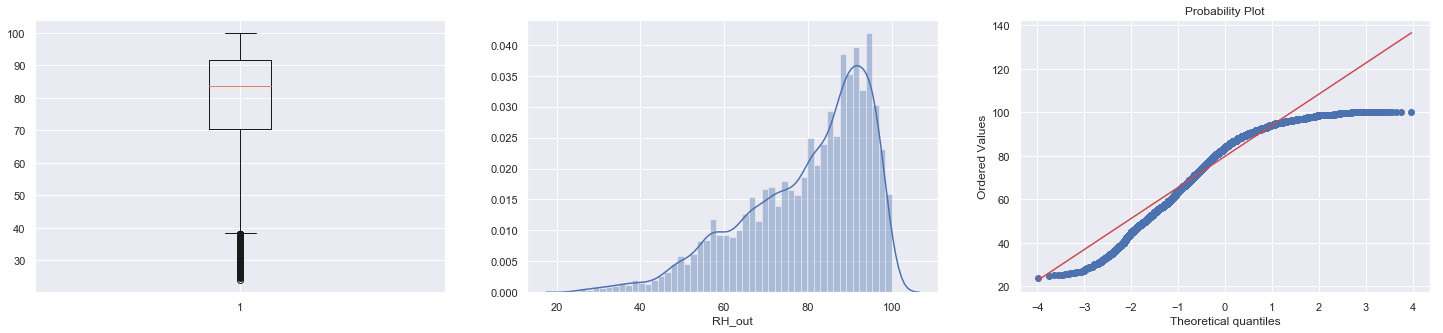

quantiles: 0.01     1.000000
0.05     1.000000
0.10     1.000000
0.25     2.000000
0.50     3.666667
0.75     5.500000
0.90     7.666667
0.95     9.000000
0.99    10.943333
Name: Windspeed, dtype: float64


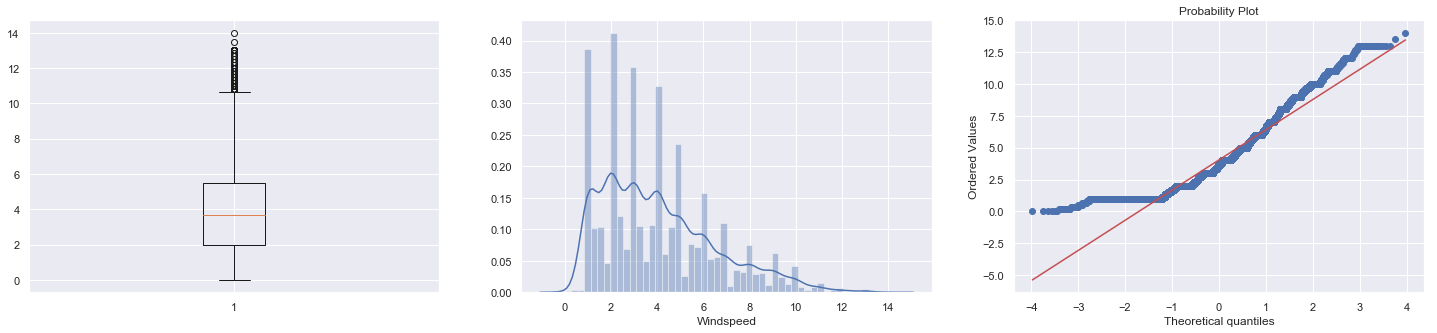

quantiles: 0.01    15.000000
0.05    21.666667
0.10    23.666667
0.25    29.000000
0.50    40.000000
0.75    40.000000
0.90    59.266667
0.95    62.666667
0.99    64.666667
Name: Visibility, dtype: float64


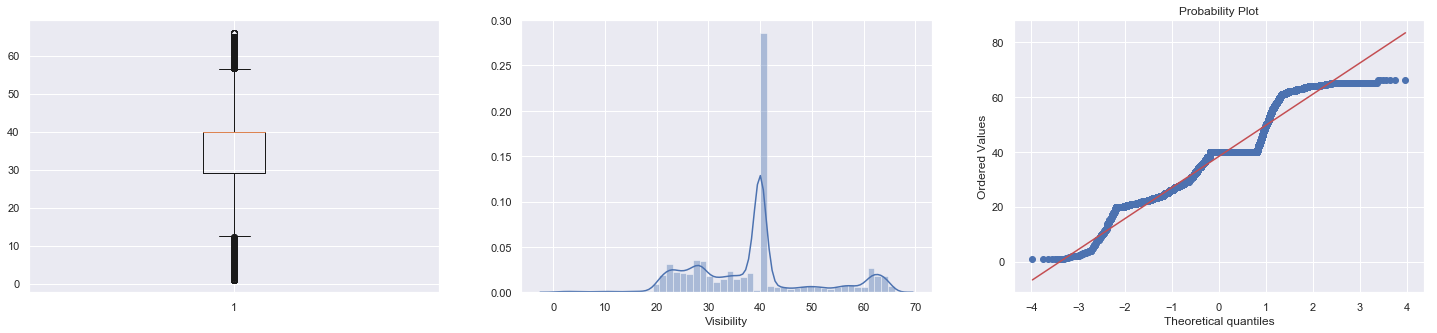

quantiles: 0.01    -5.566667
0.05    -3.100000
0.10    -1.350000
0.25     0.900000
0.50     3.433333
0.75     6.566667
0.90     9.200000
0.95    11.233333
0.99    14.050000
Name: Tdewpoint, dtype: float64


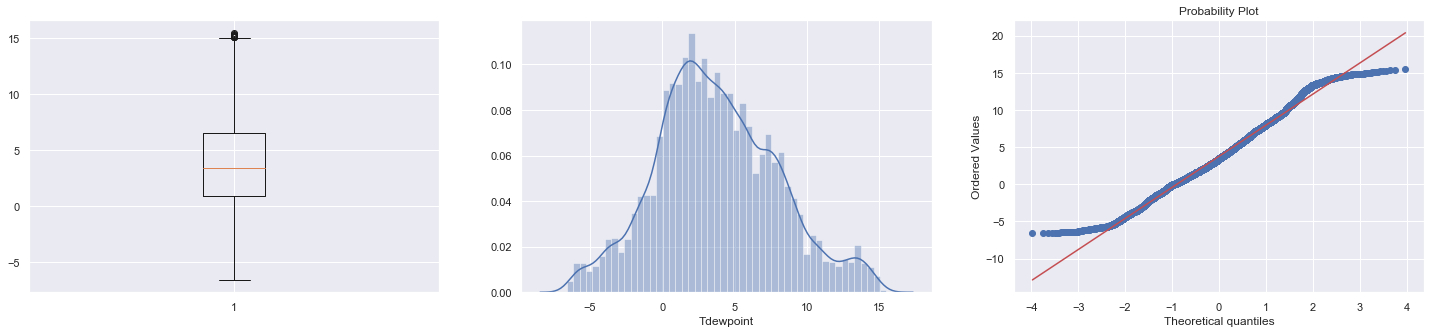

In [480]:
for col in eda_columns:
    data_shape(df[col])
    plt.show()

Some remarks about the above plots
- `RH_6, Humidity outside the building (north side), in %` looks weird. Humidity has a spike on 0 and several values below 20%. We're in Belgium while in Death Valley it nearly never goes below 23%


- `Windspeed` has strange regular spikes
`display(df['Windspeed'].value_counts().sort_index(ascending=False))
`
```
7.000000      502
6.857143        1
6.833333      102
6.714286        1
6.666667      174
6.571429        1
6.500000      131
6.428571        1
6.333333      185
```
Not really a problem (maybe related to how measurements are taken, aligned on some specific values). 
The distribution looks smoother with rounding `df['Windspeed'].apply(lambda x: np.round(x)).value_counts().sort_index(ascending=False)`
```
14.0       2
13.0      34
12.0      68
11.0     139
10.0     433
9.0      584
8.0      906
7.0      957
6.0     1871
5.0     2017
4.0     3252
3.0     2946
2.0     3771
1.0     2720
0.0       35
```

- `Visibility` has a huge spike for 40km. The value counts for values *around* 40km are not even close to the value for 40km. Really looks bad data
`df['Visibility'].value_counts().sort_index(ascending=False)`
```
40.500000      13
40.333333      10
40.166667       5
40.000000    7224
39.833333       3
39.694444       1
39.666667      15
```

### Correlation plots

In [441]:
', '.join(eda_columns)

'T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint'

In [404]:
humidity_cols = [ col for col in eda_columns if col.startswith('RH') ]
temp_cols = [ col for col in eda_columns if col.startswith('T') and col != 'Tdewpoint' ]

['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']

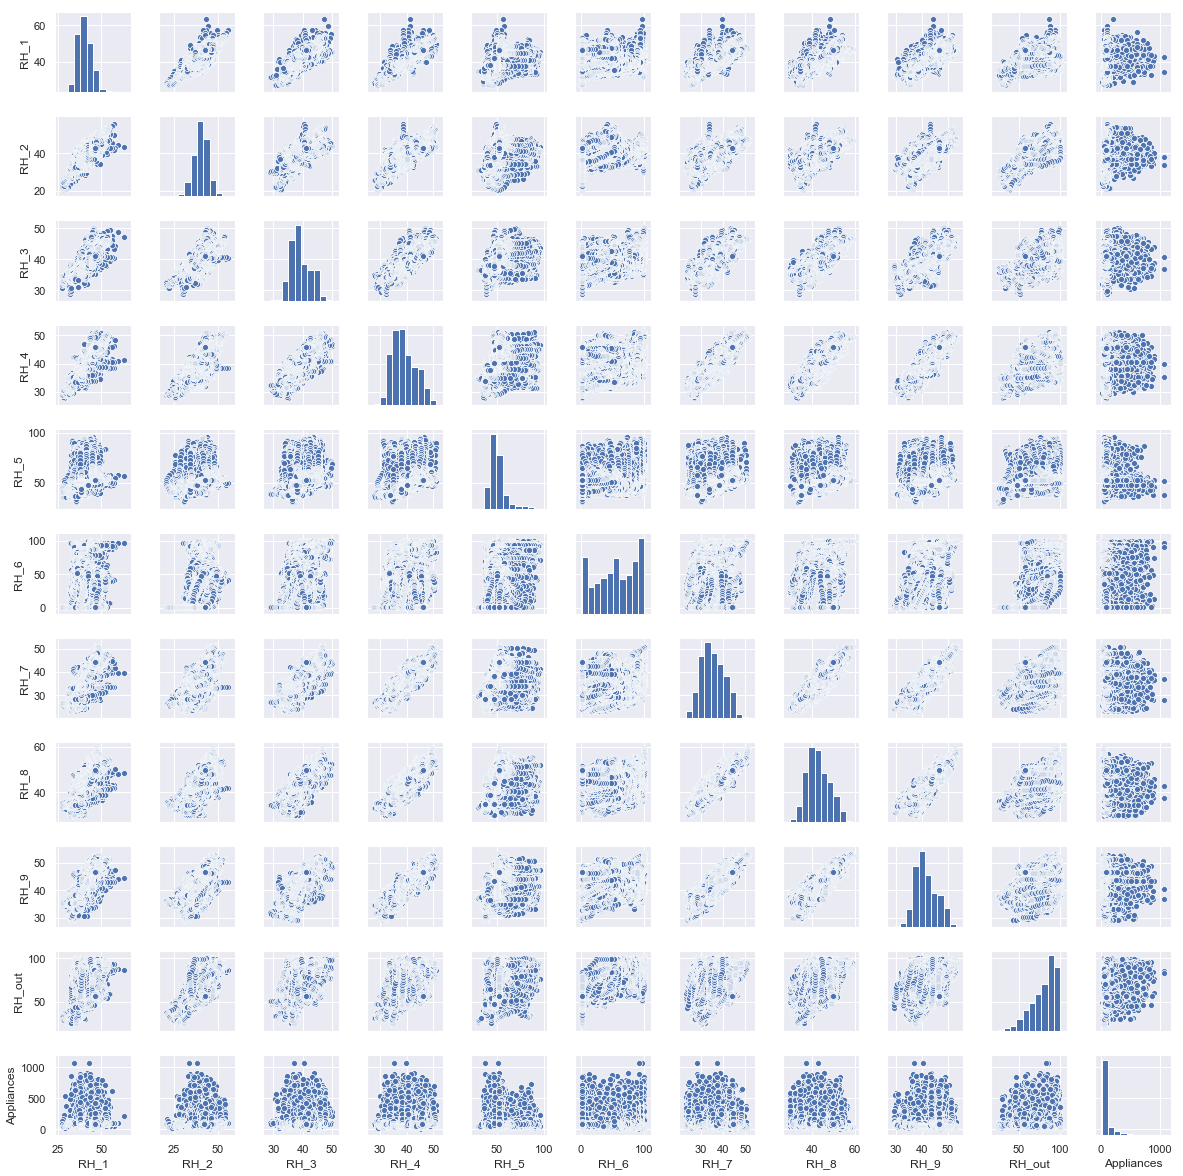

In [461]:
df_for_corr=df[humidity_cols + ['Appliances']]
sns.pairplot(df_for_corr, height=1.5);

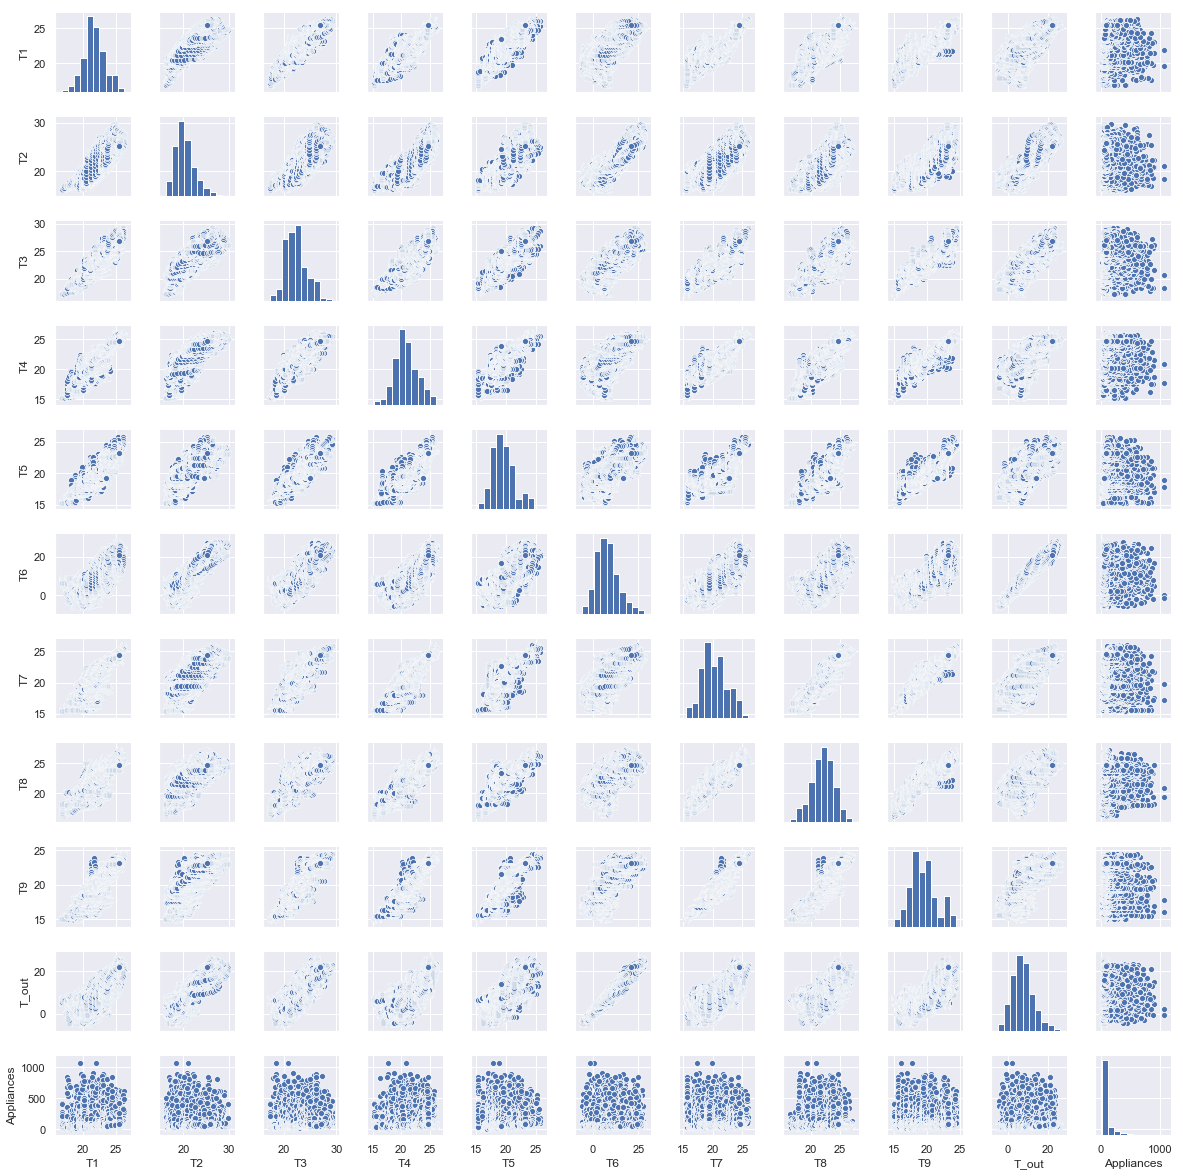

In [412]:
df_for_corr=df[temp_cols + ['Appliances']]
sns.pairplot(df_for_corr, height=1.5);

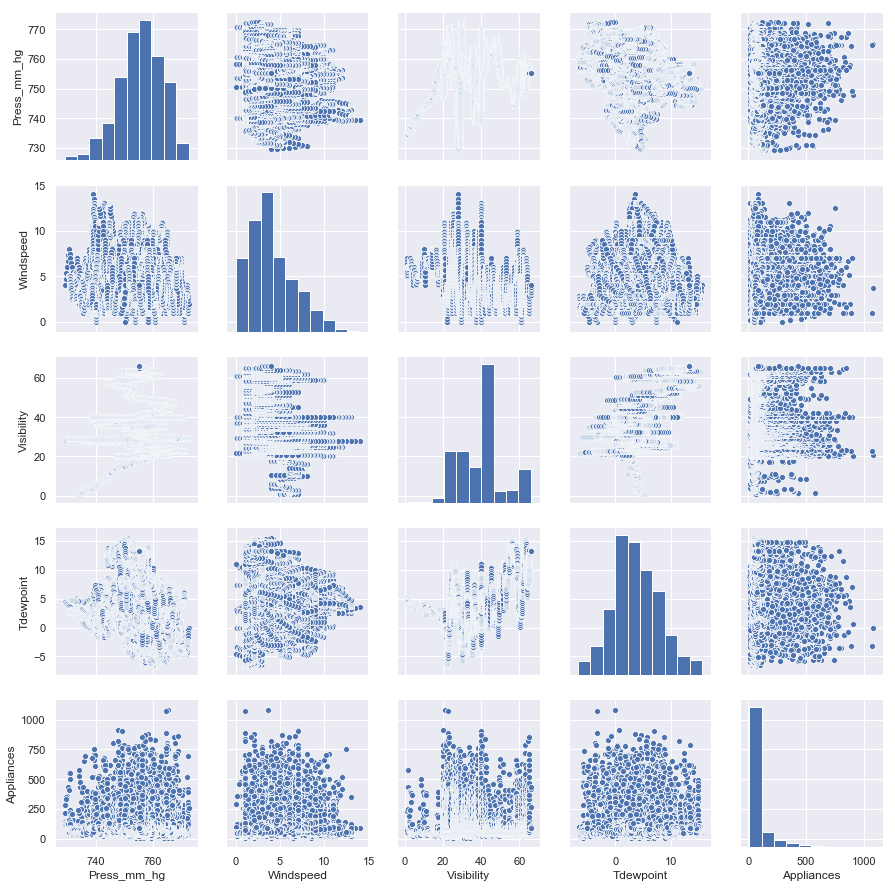

In [416]:
df_for_corr=df[['Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'Appliances']]
sns.pairplot(df_for_corr, height=2.5);

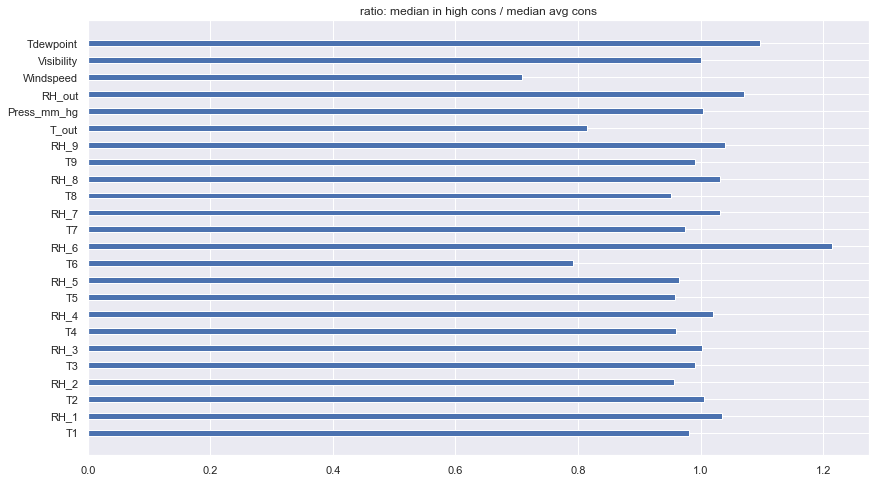

In [481]:
# recall the loooong right tail in the target variable.
# do some features increase when we go from a normal comsumption to a very high consumption ?
# here are the increase ratios
high_over_low_cons_ratio= df[df['Appliances']>800][eda_columns].median().values / df[(df['Appliances']>75) & (df['Appliances']<125)][eda_columns].median().values
#pd.Series(high_over_low_cons_ratio, index=[eda_columns])
plt.figure(figsize=(14,8))
plt.barh(np.arange(len(eda_columns)), high_over_low_cons_ratio, width,
         tick_label=eda_columns, align='center')
_=plt.title('ratio: median in high cons / median avg cons')

# result: hmmm... nothing really stands up

### Trying some models

In [10]:
X = df[df.columns[1:]].values
y = df['Appliances']
print('X.shape: %s, y.shape: %s' % (X.shape,y.shape))

X.shape: (19735, 50), y.shape: (19735,)


In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape: %s, y_train.shape: %s' % (X_train.shape,y_train.shape))
print('X_test.shape: %s, y_test.shape: %s' % (X_test.shape,y_test.shape))

X_train.shape: (14801, 50), y_train.shape: (14801,)
X_test.shape: (4934, 50), y_test.shape: (4934,)


#  GradientBoostedRegressor

In [506]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingRegressor()
params = {'n_estimators': [500,100], 'max_depth': [2,4,8], 'min_samples_split': [2,5],
          'learning_rate': [0.01,0.1], 'loss': ['ls','lad']}
clf_grid = GridSearchCV(clf, params)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 100], 'max_depth': [2, 4, 8], 'min_samples_split': [2, 5], 'learning_rate': [0.01, 0.1], 'loss': ['ls', 'lad']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [507]:
print("clf_grid.best_params_: %s" % str(clf_grid.best_params_))
print("clf_grid.best_estimator_: %s" % str(clf_grid.best_estimator_))
print("clf_grid.best_score_: %s" % str(clf_grid.best_score_))
best_clf = clf_grid.best_estimator_

clf_grid.best_params_: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 500}
clf_grid.best_estimator_: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
clf_grid.best_score_: 0.467219018706


In [527]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [528]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.4f" % mean_squared_error(y_train, y_train_pred))
print("MSE test: %.4f" % mean_squared_error(y_test, y_test_pred))

from sklearn.metrics import r2_score
print('R2 train: %.5f' % r2_score(y_train, y_train_pred))
print('R2 test: %.5f' % r2_score(y_test, y_test_pred))

MSE train: 127.6373
MSE test: 4005.5984
R2 train: 0.98807
R2 test: 0.59677


In [722]:
def plot_results(y_train, y_train_pred, y_test, y_test_pred):
    x = np.linspace(0,600,200)
    plt.scatter(y_train, y_train_pred,alpha=.1)
    plt.plot(x,x,c='r')
    plt.grid(True)
    plt.title('train y prediction')
    plt.show()
    plt.scatter(y_test, y_test_pred,alpha=.1)
    plt.plot(x,x,c='r')
    plt.title('test y prediction')
    plt.grid(True)

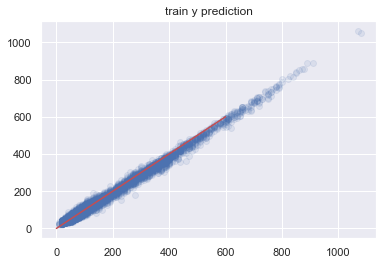

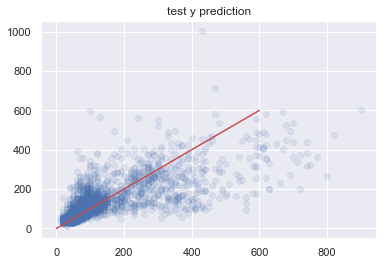

In [530]:
plot_results(y_train, y_train_pred, y_test, y_test_pred)

<BarContainer object of 50 artists>

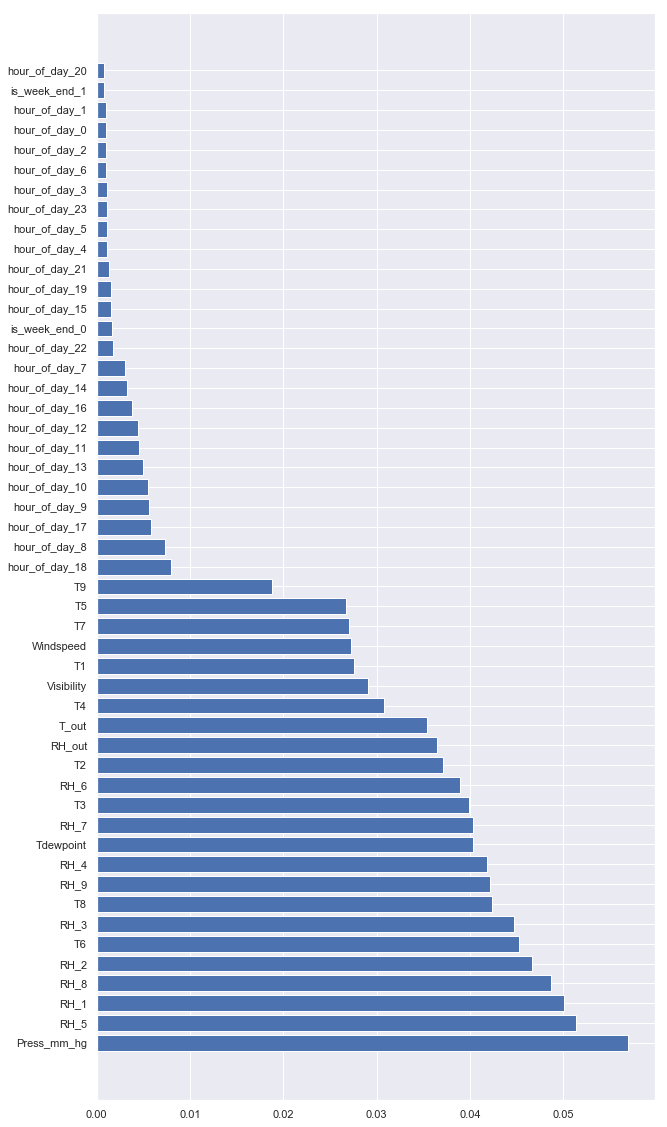

In [517]:
importance_indices=np.argsort(best_clf.feature_importances_)[::-1]
plt.figure(figsize=(10,20))
plt.barh(range(len(best_clf.feature_importances_)),  best_clf.feature_importances_[importance_indices], 
         tick_label=df.columns[1:][importance_indices], align='center')

# Try Polynomial Features + GradientBoostedRegressor
Abandon time related columns: don't seem to be important according to GBR feature importances and would make the number of features explode after applying polynomial transformer

In [561]:
poly_columns = df.columns[1:list(df.columns).index('Tdewpoint')+1]  
poly_columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

In [562]:
X = df[poly_columns].values
y = df['Appliances']
print('X.shape: %s, y.shape: %s' % (X.shape,y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape: %s, y_train.shape: %s' % (X_train.shape,y_train.shape))
print('X_test.shape: %s, y_test.shape: %s' % (X_test.shape,y_test.shape))

X.shape: (19735, 24), y.shape: (19735,)
X_train.shape: (14801, 24), y_train.shape: (14801,)
X_test.shape: (4934, 24), y_test.shape: (4934,)


#### First try manually with chosen set of params

In [579]:
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled.shape: %s' % str(X_train_scaled.shape))
print('X_test_scaled.shape: %s' % str(X_test_scaled.shape))

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train_poly.shape: %s' % str(X_train_poly.shape))
print('X_test_poly.shape: %s' % str(X_test_poly.shape))

X_train_scaled.shape: (14801, 24)
X_test_scaled.shape: (4934, 24)
X_train_poly.shape: (14801, 324)
X_test_poly.shape: (4934, 324)


In [580]:
params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train_poly, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [581]:
y_train_pred = clf.predict(X_train_poly)
y_test_pred = clf.predict(X_test_poly)

In [582]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.4f" % mean_squared_error(y_train, y_train_pred))
print("MSE test: %.4f" % mean_squared_error(y_test, y_test_pred))

from sklearn.metrics import r2_score
print('R2 train: %.5f' % r2_score(y_train, y_train_pred))
print('R2 test: %.5f' % r2_score(y_test, y_test_pred))

MSE train: 8764.4897
MSE test: 8497.6140
R2 train: 0.18110
R2 test: 0.14458


#### Then same with grid search
Actually gridsearch takes a too long time. Manually tried these:

- `params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}`  
  R^2 train: 0.18110  
  R^2 test: 0.14458
- `params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2, 'learning_rate': 0.1, 'loss': 'ls'}`  
  R^2 train: 0.99201  
  R^2 test: 0.58819
- `params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 4, 'learning_rate': 0.1, 'loss': 'ls'}`  
  R^2 train: 0.99156  
  R^2 test: 0.59808
  
### This last R^2 of 59.8% on test set.
This is the best result in this notebook. Comprehensive gridsearch may well find a better result.

In [724]:
from sklearn.pipeline import make_pipeline
pipe = Pipeline([('scl',StandardScaler()), 
                 ('pf', PolynomialFeatures(degree=2, include_bias=False)), 
                 ('gbr', GradientBoostingRegressor())])
# param_grid = {'gbr__n_estimators': [500,100], 'gbr__max_depth': [2,4,8], 'gbr__min_samples_split': [2,5],
#               'gbr__learning_rate': [0.01,0.1], 'gbr__loss': ['ls','lad']}
#param_grid = {'gbr__n_estimators': [500], 'gbr__max_depth': [8], 'gbr__min_samples_split': [2],
#              'gbr__learning_rate': [0.1], 'gbr__loss': ['ls']} # best model wihout PCA or poly
param_grid = {'gbr__n_estimators': [500], 'gbr__max_depth': [8], 'gbr__min_samples_split': [4],
              'gbr__learning_rate': [0.1], 'gbr__loss': ['ls']} 
clf_grid = GridSearchCV(pipe, param_grid)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pf', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('gbr', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_fe...       presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gbr__n_estimators': [500], 'gbr__max_depth': [8], 'gbr__min_samples_split': [4], 'gbr__learning_rate': [0.1], 'gbr__loss': ['ls']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [726]:
best_poly_clf = clf_grid.best_estimator_
y_train_pred = best_poly_clf.predict(X_train)
y_test_pred = best_poly_clf.predict(X_test)

In [727]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.4f" % mean_squared_error(y_train, y_train_pred))
print("MSE test: %.4f" % mean_squared_error(y_test, y_test_pred))

from sklearn.metrics import r2_score
print('R2 train: %.5f' % r2_score(y_train, y_train_pred))
print('R2 test: %.5f' % r2_score(y_test, y_test_pred))

MSE train: 90.3695
MSE test: 3992.6101
R2 train: 0.99156
R2 test: 0.59808


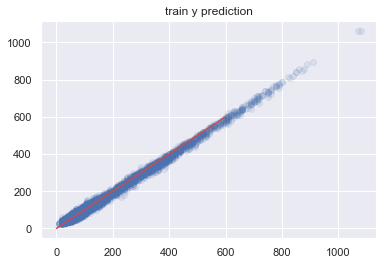

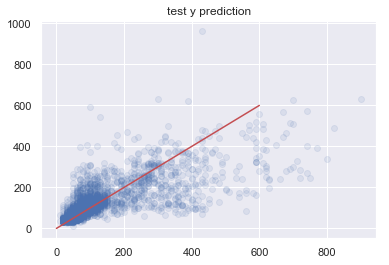

In [728]:
plot_results(y_train, y_train_pred, y_test, y_test_pred)

# Try Dimension Reduction with PCA + GradientBoostedRegressor


In [703]:
# here too: abandon time related columns: don't seem to be important according to GBR feature 
# importances and would make the number of features explode after applying polynomial transformer
pca_columns = df.columns[1:list(df.columns).index('Tdewpoint')+1]  
pca_columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

In [704]:
X = df[pca_columns].values
y = df['Appliances']
print('X.shape: %s, y.shape: %s' % (X.shape,y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape: %s, y_train.shape: %s' % (X_train.shape,y_train.shape))
print('X_test.shape: %s, y_test.shape: %s' % (X_test.shape,y_test.shape))

X.shape: (19735, 24), y.shape: (19735,)
X_train.shape: (14801, 24), y_train.shape: (14801,)
X_test.shape: (4934, 24), y_test.shape: (4934,)


[ 0.38852599  0.29362854  0.07536682  0.04433112  0.04057953  0.0390958 ]
[ 0.38852599  0.68215453  0.75752135  0.80185247  0.842432    0.8815278 ]


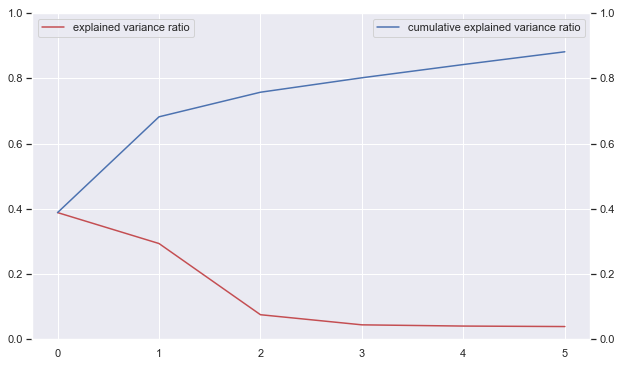

In [705]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# retaining 6 principal components since captures 89% of the variance
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train_std)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(pca.explained_variance_ratio_,c='r')
ax1.legend(['explained variance ratio'],loc=2)
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
ax2.plot(np.cumsum(pca.explained_variance_ratio_),c='b')
ax2.legend(['cumulative explained variance ratio'],loc=1)
ax2.grid(False)
ax2.set_ylim(0, 1)

print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

In [706]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print('X_train_pca.shape: %s, y_train.shape: %s' % (X_train_pca.shape,y_train.shape))
print('X_test_pca.shape: %s, y_test.shape: %s' % (X_test_pca.shape,y_test.shape))

X_train_pca.shape: (14801, 6), y_train.shape: (14801,)
X_test_pca.shape: (4934, 6), y_test.shape: (4934,)


In [708]:
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train_pca, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [709]:
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

In [730]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.4f" % mean_squared_error(y_train, y_train_pred))
print("MSE test: %.4f" % mean_squared_error(y_test, y_test_pred))

from sklearn.metrics import r2_score
print('R^2 train: %.5f' % r2_score(y_train, y_train_pred))
print('R^2 test: %.5f' % r2_score(y_test, y_test_pred))

MSE train: 90.3695
MSE test: 3992.6101
R2 train: 0.99156
R2 test: 0.59808
results not really good... Should retry with grid search


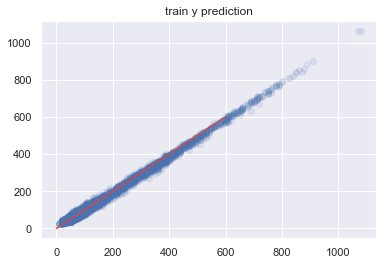

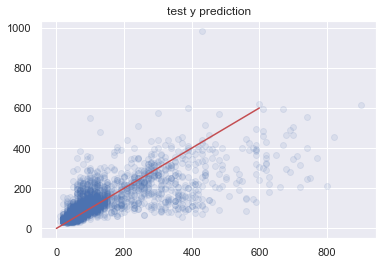

In [725]:
plot_results(y_train, y_train_pred, y_test, y_test_pred)

### Try with KernelPCA

In [731]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=6, kernel='rbf', gamma=15)
pca.fit(X_train_std)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=15, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=6, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

In [732]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print('X_train_pca.shape: %s, y_train.shape: %s' % (X_train_pca.shape,y_train.shape))
print('X_test_pca.shape: %s, y_test.shape: %s' % (X_test_pca.shape,y_test.shape))

X_train_pca.shape: (14801, 6), y_train.shape: (14801,)
X_test_pca.shape: (4934, 6), y_test.shape: (4934,)


In [733]:
#params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train_pca, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [734]:
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

In [736]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.4f" % mean_squared_error(y_train, y_train_pred))
print("MSE test: %.4f" % mean_squared_error(y_test, y_test_pred))

from sklearn.metrics import r2_score
print('R^2 train: %.5f' % r2_score(y_train, y_train_pred))
print('R^2 test: %.5f' % r2_score(y_test, y_test_pred))
print('results kind of suck...')

MSE train: 7811.3072
MSE test: 13813.1970
R^2 train: 0.27016
R^2 test: -0.39052
results kind of suck...


### With standard linear regression with regularization

In [740]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

clf = Ridge()
clf.fit(X_train_scaled,y_train)
y_train_pred = clf.predict(X_train_scaled)

from sklearn.metrics import r2_score
print('R2 train: %.5f' % r2_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test_scaled)
print('R2 test: %.5f' % r2_score(y_test, y_test_pred))

R2 train: 0.14795
R2 test: 0.13903


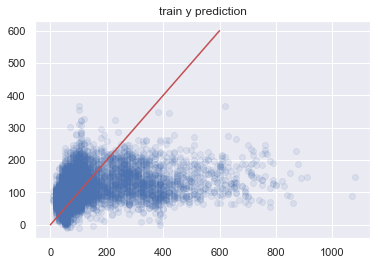

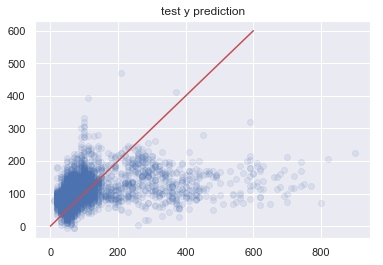

In [747]:
plot_results(y_train, y_train_pred, y_test, y_test_pred)

With results above, probably not worth tuning more the Ridge model
## So best R^2 result on the test set is obtained with polynomial features with GradientBoostedRegressor: 59.8%
Better than the 57% mentioned on https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub